# Worked Example #3

Consider the same structure from Worked Example #2. However, now the structure is subject to a harmonic force with magnitude $P_0 = 600 \:N$ and a forcing frequency $f = 0.9 \:Hz$


Using this forcing information and the structural information obtained in Worked Example #2:
<ol>
    <li>Determine the dynamic magnification factor and phase shift between force and response</li>
    <li>Plot the complete structural response for the time range, $0\leq t\leq 60$</li>
    <li>If the harmonic force is removed at $t=11$ s, determine the mass position at $t=30$ s. </li>
</ol>
<hr>

# Solution

In [1]:
# Dependencies
import math #Basic math library
import numpy as np #Numpy -> tools for working with arrays
import matplotlib.pyplot as plt #Matplotlib -> tools for plotting
pi = math.pi

# Constants
m = 10000 # (kg) Mass
xi = 0.02 # Damping ratio
P = 600 # (N) Harmonic force amplitude
f = 0.9 # (Hz) Harmonic forcing frequency
omega = 2*pi*f # (rads/sec) Angular harmonic forcing frequency
P_static = 1500 # (N) Static force magnitude
Delta_static = 7 # (mm) Static displacement

# Dynamic parameters
k = P_static/(Delta_static/1000) #(N/m) Stiffness
omega_n = round(math.sqrt(k/m),3) #(rads/sec) Angular natural frequency
f_n = round(omega_n/(2*math.pi),3) # (Hz) Natural frequency
T = round(1/f_n,2) # (sec) Period of oscillation

### 1. DMF and phase shift, $\phi$
Determine the dynamic magnification factor and phase shift between force and response

\begin{equation}
DMF = \frac{1}{\sqrt{(1-\beta^2)^2 + (2\xi\beta)^2}}
\end{equation}

In [2]:
beta = omega/omega_n # Frequency ratio
DMF = 1/math.sqrt((1-beta**2)**2 + (2*xi*beta)**2) #Dynamic Magnification Factor

Phase shift between harmonic force and steady-state response, $\phi$

\begin{equation}
\phi = \tan^{-1}\left(\frac{2\xi\beta}{1-\beta^2}\right)
\end{equation}

*Note the negative denominator here*

In [3]:
phase = np.arctan2((2*xi*beta),(1-beta**2)) #Phase angle between force and response (arctan identifies correct quadrant)

**Visualise variation of $\phi$ with $\beta$**

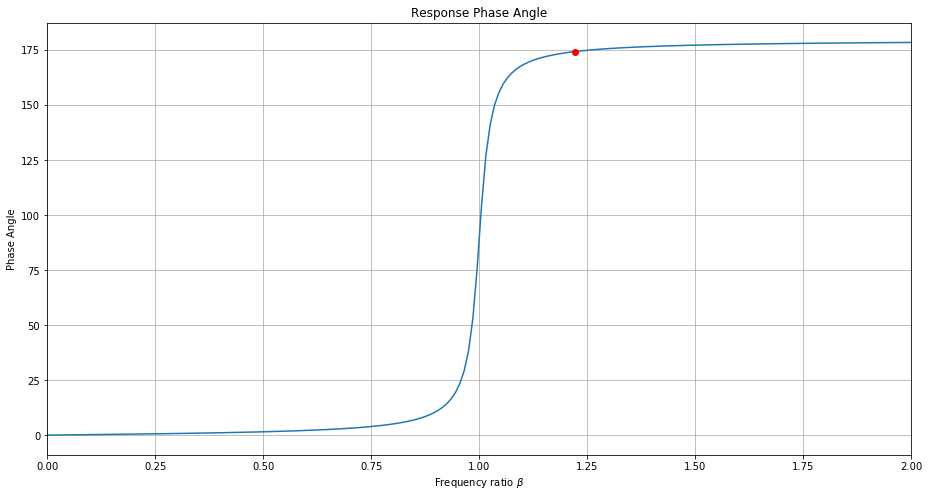

In [4]:
#Generate range of Beta values
max_B = 2 #Max value of Beta
delta_B = 0.01 #Step size in range of Beta values
nPoints = max_B/delta_B #Number of datapoints in the range
B = np.linspace(0,max_B, int(nPoints)) #Vector of Beta values

phi = np.arctan2((2*xi*B),(1-B**2))

#Set up the figure 
fig = plt.figure() 
axes = fig.add_axes([0.1,0.1,2,1.5]) 
axes.plot(B,phi*(180/pi))
axes.plot([beta],[phase*(180/pi)],'ro')
axes.set_xlim([0,max_B])
axes.set_xlabel('Frequency ratio $\\beta$')
axes.set_ylabel('Phase Angle')
axes.set_title('Response Phase Angle')
axes.grid()  

### Output so far:

In [5]:
#OUTPUT
print('The frequency ratio is {one}.'.format(one=round(beta,3)))
print('The dynamic magnification factor is {one}.'.format(one=round(DMF,3)))
print('Dividing the force magnitide by the stiffness, gives a static deflection of {one} m. The DMF indicates a steady-state dynamic amplitude of {two} m.'.format(one=round(P/k,4),two=(round(DMF*P/k,4))))
print('The phase difference between force and response is {one} radians or {two} degrees.'.format(one=round(phase,3),two=round(phase*180/pi,1)))

The frequency ratio is 1.222.
The dynamic magnification factor is 2.021.
Dividing the force magnitide by the stiffness, gives a static deflection of 0.0028 m. The DMF indicates a steady-state dynamic amplitude of 0.0057 m.
The phase difference between force and response is 3.043 radians or 174.3 degrees.


### 2. Structural response for  $0\leq t\leq 60$

The following equation describes the response of the system to harmonic loading,

\begin{equation}
u(t) = \underbrace{e^{-\xi\omega_nt}[A\sin(\omega_dt) + B\cos(\omega_dt)]}_{\text{Transient}} + \underbrace{\frac{P_0}{k}\left[\frac{1}{(1-\beta^2)^2+(2\xi\beta)^2}\right][(1-\beta^2)\sin(\omega t) - 2\xi\beta\cos(\omega t)]}_{\text{Steady-state}} 
\end{equation}

In order to use this equation we must first determine the constants $A$ and $B$ within the transient component. We do this by applying the initial conditions, in this case at $t=0$, the mass is at rest and therefore the position, $u(t=0)$ and velocity, $\dot{u}(t=0)$ are zero.

To apply the second boundary condition on velocity we must first differentiate our expression for $u(t)$. First we will make some substitutions to make the equation easier to digest, let,

\begin{equation}
\Omega = \frac{P_0}{k}\left[\frac{1}{(1-\beta^2)^2+(2\xi\beta)^2}\right]
\end{equation}

\begin{equation}
C_1 = \Omega\:(1-\beta^2)
\end{equation}

\begin{equation}
C_2 = -\Omega\:2\:\xi\:\beta
\end{equation}

This allows us to rewrite the equation for $u(t)$ as,

\begin{equation}
u(t) = A\underbrace{\left[e^{-\xi\omega_nt}\:\sin(\omega_d t) \right]}_{f_1(t)} + B\underbrace{\left[e^{-\xi\omega_nt}\:\cos(\omega_d t) \right]}_{f_2(t)} + C_1\:\underbrace{\sin(\omega t)}_{f_3(t)} + C_2\:\underbrace{\cos(\omega t)}_{f_4(t)}
\end{equation}

Now each of the four functions of $t$ can be differentiated in turn. Both $f_1(t)$ and $f_2(t)$ can be processed using the product rule while $f_3(t)$ and $f_4(t)$ and be processed using the chain rule. Evaluating each in turn,

\begin{equation}
\frac{\mathrm{d}}{\mathrm{d}t}f_1(t) = e^{-\xi\omega_nt}\omega_d\cos(\omega_dt) - \sin(\omega_dt)\: \xi\omega_n \: e^{-\xi\omega_nt}
\end{equation}

\begin{equation}
\frac{\mathrm{d}}{\mathrm{d}t}f_2(t) = -e^{-\xi\omega_nt}\omega_d\sin(\omega_dt) - \cos(\omega_dt)\:\xi\omega_n\:e^{-\xi\omega_nt}
\end{equation}

\begin{equation}
\frac{\mathrm{d}}{\mathrm{d}t}f_3(t) = \omega\cos(\omega t)
\end{equation}

\begin{equation}
\frac{\mathrm{d}}{\mathrm{d}t}f_4(t) = -\omega\sin(\omega t)
\end{equation}

Combining these four expressions we obtain our expression for the velovity, $\dot{u}(t)$,

\begin{equation}
\begin{split}
\dot{u}(t) =  & \:A\left[e^{-\xi\omega_nt}\omega_d\cos(\omega_dt) - \sin(\omega_dt)\: \xi\omega_n \: e^{-\xi\omega_nt} \right] + \\  & \:B\left[ -e^{-\xi\omega_nt}\omega_d\sin(\omega_dt) - \cos(\omega_dt)\:\xi\omega_n\:e^{-\xi\omega_nt}\right] + \\ &\: C_1\:\omega\cos(\omega t) - C_2\: \:\omega\sin(\omega t)
\end{split}
\end{equation}

Expressions for $u(t)$ and $\dot{u}(t)$ can now be evaluated at $t=0$. Helpfully many of the terms disappear due to the fact $t=0$. Evaluating the two equations for the two unknowns, $A$ and $B$ yields,

\begin{equation}
A = -\frac{1}{\omega_d}(C_1\:\omega + C_2\:\xi\:\omega_n)
\end{equation}

\begin{equation}
B=-C_2
\end{equation}

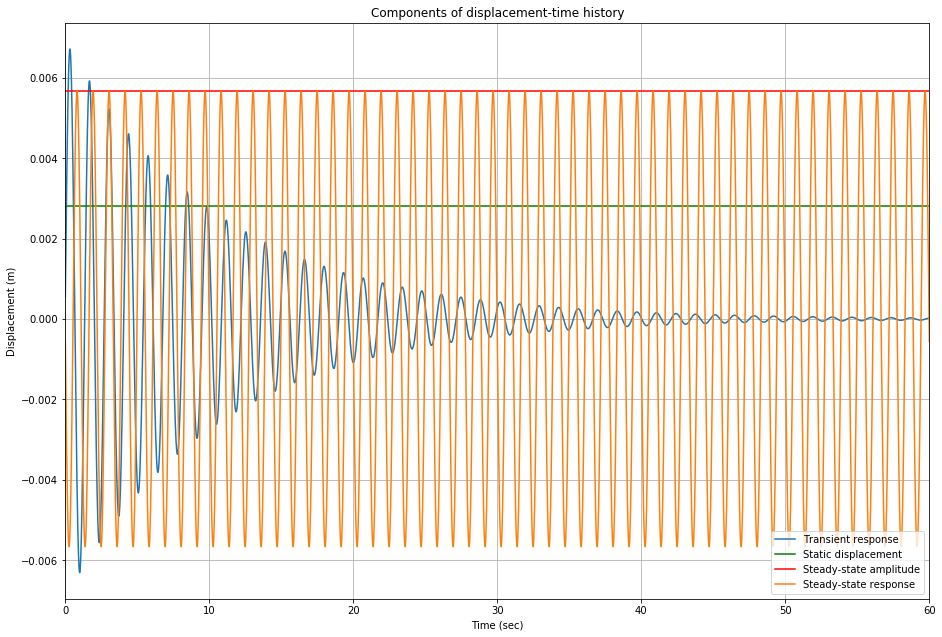

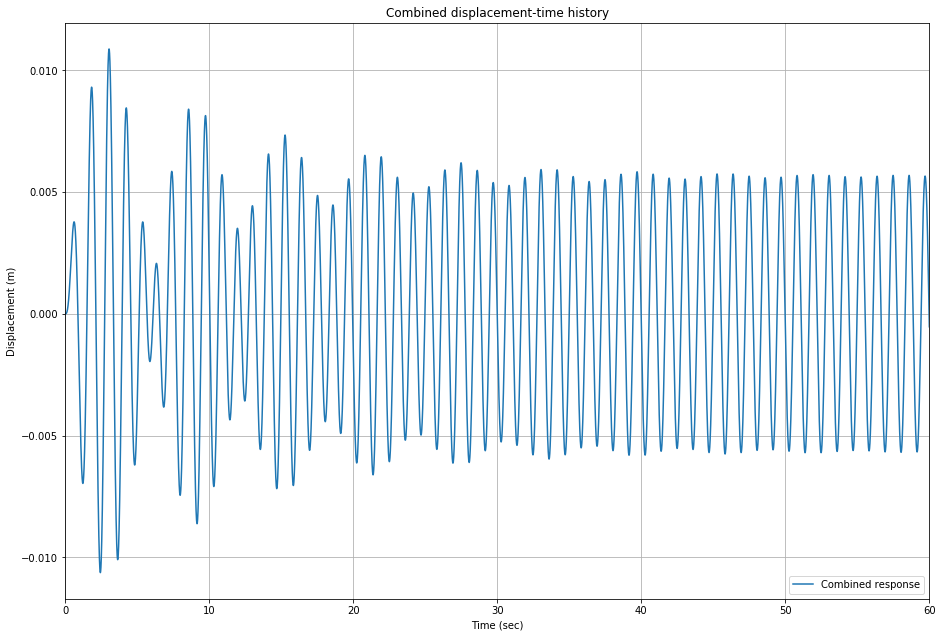

In [6]:
#CONSTANTS
O = (P/k)*(1/((1-beta**2)**2 + (2*xi*beta)**2)) #Capital Omega defined above
C1 = O*(1-beta**2) #Defined above
C2 = -O*2*xi*beta #Defined above
omega_d = omega_n*math.sqrt(1-xi**2) #Damped natural frequency
A = (-1/omega_d)*(C2*xi*omega_n + C1*omega) #Constant of integration
B = -C2 #Constant of integration

tmax = 60 #(sec) The max time
delta_t = 0.001 #(sec) The timestep
nPoints = tmax/delta_t #Number of equally spaced data points
t = np.linspace(0,tmax, int(nPoints)) # Time vector

ut = math.e**(-xi*omega_n*t)*(A*np.sin(omega_d*t) + B*np.cos(omega_d*t)) #Transient response
us = O*((1-beta**2)*np.sin(omega*t) - 2*xi*beta*np.cos(omega*t)) #Steady-state response

#Plotting (0-60)
fig = plt.figure() 
axes = fig.add_axes([0.1,0.1,2,2]) 
axes.plot(t,ut,'-',label='Transient response')
axes.plot([0,tmax],[P/k,P/k],'g', label='Static displacement')
axes.plot([0,tmax],[DMF*P/k,DMF*P/k],'r', label='Steady-state amplitude')
axes.plot(t,us, '-', label='Steady-state response')
axes.set_xlim([0,tmax])
axes.set_xlabel('Time (sec)')
axes.set_ylabel('Displacement (m)')
axes.set_title('Components of displacement-time history')
axes.grid()
axes.legend(loc='lower right')

#Plotting (0-60)
fig = plt.figure() 
axes = fig.add_axes([0.1,0.1,2,2]) 
axes.plot(t,(ut+us), label='Combined response')
axes.set_xlim([0,tmax])
axes.set_xlabel('Time (sec)')
axes.set_ylabel('Displacement (m)')
axes.set_title('Combined displacement-time history')
axes.grid()
axes.legend(loc='lower right')
plt.show()

We can see that the initial transient response decays as expected and thereafter the system behaviour is well described by the steady-state response. It is for this reason that we often ignore the transient response. 

### 3. Free vibration response  $11\leq t\leq 30$
Harmonic force is removed at $t=11$ s, determine the mass position at $t=30$ s.

This question requires us to evaluate the free vibration of the system when the initial conditions are not zero. First we must determine the position and velocity of the system at the instant the harmonic force is removed at $t=11$ s. We can do this by evaluating the equations for $u(t=11)$ and $\dot{u}(t=11)$ derived above.

In [7]:
time = 11 #Time instant

#Position
ut7 = math.e**(-xi*omega_n*time)*(A*np.sin(omega_d*time) + B*np.cos(omega_d*time)) #Transient response
us7 = O*((1-beta**2)*np.sin(omega*time) - 2*xi*beta*np.cos(omega*time)) #Steady-state response
u = ut7+us7 #Combined response
print('The position of the system at t=11 s is {one} m'.format(one=round(u,4)))

#Velocity
term_1 = math.e**(-xi*omega_n*time)*omega_d*np.cos(omega_d*time) - np.sin(omega_d*time)*xi*omega_n*math.e**(-xi*omega_n*time)
term_2 = -1*math.e**(-xi*omega_n*time)*omega_d*np.sin(omega_d*time) - np.cos(omega_d*time)*xi*omega_n*math.e**(-xi*omega_n*time)
v = A*(term_1) + B*(term_2) + C1*(omega*np.cos(omega*time)) - C2*(omega*np.sin(omega*time))
print('The velocity of the system at t=11 s is {one} m/s'.format(one=round(v,4)))

The position of the system at t=11 s is 0.0045 m
The velocity of the system at t=11 s is -0.0191 m/s


These values of $u(t)$ and $\dot{u}(t)$ now serve as the initial conditions when determining the free vibration response at $t=30$ s. Remember we are now only concerned with the transient response,

\begin{equation}
u(t) = e^{-\xi\omega_nt}[A\sin(\omega_dt) + B\cos(\omega_dt)]
\end{equation}

We must now determine the constants $A$ and $B$ with our new initial conditions. From above, we can restate our expressions for $u(t)$ and $\dot{u}(t)$,

\begin{equation}
u(t) = A\left[e^{-\xi\omega_nt}\:\sin(\omega_d t) \right] + B\left[e^{-\xi\omega_nt}\:\cos(\omega_d t) \right] 
\end{equation}

\begin{equation}
\dot{u}(t) = A\left[e^{-\xi\omega_nt}\omega_d\cos(\omega_dt) - \sin(\omega_dt)\: \xi\omega_n \: e^{-\xi\omega_nt}\right] + B\left[-e^{-\xi\omega_nt}\omega_d\sin(\omega_dt) - \cos(\omega_dt)\:\xi\omega_n\:e^{-\xi\omega_nt} \right]
\end{equation}

Evaluating both expressions for the boundary conditions $u(t=11) =0.0045$ and $\dot{u}(t=11) = -0.0191$ results in two simultaneous equations,

In [8]:
#Numerical evaluating the terms in squate brackets...
a = math.e**(-xi*omega_n*time)*np.sin(omega_d*time) #Term in brackets beside A in equation for u(t) above
b = math.e**(-xi*omega_n*time)*np.cos(omega_d*time) #Term in brackets beside B in equation for u(t) above
print('a = {one}'.format(one =round(a,4)))
print('b = {one}'.format(one =round(b,4)))
print('term 1 = {one}'.format(one =round(term_1,3))) #Term in brackets beside A in equation for v(t) above
print('term 2 = {one}'.format(one =round(term_2,3))) #Term in brackets beside B in equation for v(t) above

a = 0.2167
b = 0.289
term 1 = 1.317
term 2 = -1.029


Therefore the system of equations, in martix form is,

\begin{equation}
\begin{bmatrix}
    0.2167 & 0.289 \\
    1.317 & -1.029
\end{bmatrix}\times
\begin{bmatrix}
    A \\
    B
\end{bmatrix} = 
\begin{bmatrix}
    0.0045 \\
    -0.0191
\end{bmatrix}
\end{equation}

Solving for A and B...

In [9]:
#Matrix
matrix = np.mat([[a,b],[term_1,term_2]])

#Vector
vector = np.array([[u],[v]])
constants = matrix.I*vector
A = constants[0].item()
B = constants[1].item()
print('A = {one}'.format(one=round(A,3)))
print('B = {one}'.format(one=round(B,3)))

A = -0.001
B = 0.017


Now we can evaluate the equation for free vibration at $t=30$ s. 

In [10]:
time = 30 #Time instant
a = math.e**(-xi*omega_n*time)*np.sin(omega_d*time) #Term in brackets beside A in equation for u(t) above
b = math.e**(-xi*omega_n*time)*np.cos(omega_d*time) #Term in brackets beside B in equation for u(t) above

u30 = (A*a + B*b).item()
print('The free vibration response at t=30s is {one} m'.format(one=round(u30,4)))

The free vibration response at t=30s is 0.0008 m


We can go one step further now and plot the free vibration response from $t=30$ s.

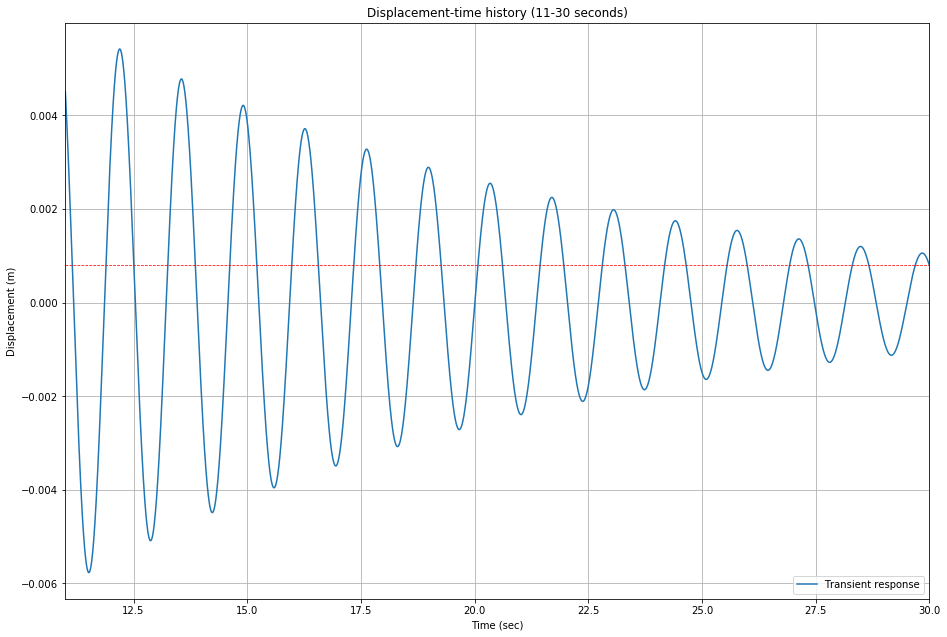

In [11]:
tmax = 30 #(sec) The max time
delta_t = 0.001 #(sec) The timestep
nPoints = tmax/delta_t #Number of equally spaced data points
t = np.linspace(11,tmax, int(nPoints)) # Time vector

ut = math.e**(-xi*omega_n*t)*(A*np.sin(omega_d*t) + B*np.cos(omega_d*t)) #Transient response

#Plotting (11-30s)
fig = plt.figure() 
axes = fig.add_axes([0.1,0.1,2,2]) 
axes.plot(t,ut,label='Transient response')
axes.plot([11, tmax],[u30, u30], 'r--', lw=0.75)
axes.set_xlim([11,30])
axes.set_xlabel('Time (sec)')
axes.set_ylabel('Displacement (m)')
axes.set_title('Displacement-time history (11-30 seconds)')
axes.grid()
axes.legend(loc='lower right')
plt.show()